# ROC curve 

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("glassTrain.csv",  index_col=0)    
df_test = pd.read_csv("glassTest.csv",  index_col=0)    

## Preprocessing, dropping columns and rows

In [7]:
mlx_df = df[ ['RI', 'Na', 'Mg', 'Si', 'K', 'Ba', 'Fe', 'type'] ]
mlx_df.type.value_counts()

2    51
1    47
7    19
3    11
5     9
6     6
Name: type, dtype: int64

In [8]:
roc_df = mlx_df.drop(mlx_df[mlx_df.type.isin([5,6,7])].index)
roc_df[roc_df.type == 3] = 1
roc_df[roc_df.type == 2] = 0

In [9]:
roc_df.type.value_counts()

1    58
0    51
Name: type, dtype: int64

In [10]:
X = roc_df.iloc[:, :-1 ].values
y = roc_df.iloc[:, -1: ].values.flatten()

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array([0, 1], dtype=int64)

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

In [19]:
# rf=RandomForestClassifier( n_estimators= 10
#                             , max_depth= 1
#                             , n_jobs=-1)
rf = make_pipeline( StandardScaler()
                   ,PCA(n_components=2)
                   , LogisticRegression(solver='lbfgs') )

[0. 0. 0. 0. 0. 1.]
[0.         0.01724138 0.65517241 0.84482759 1.         1.        ]


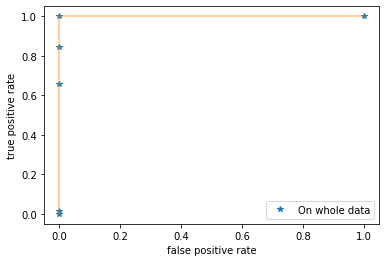

In [20]:
from sklearn.model_selection import StratifiedKFold
from scipy import interp

probas = rf.fit(X,y).predict_proba(X)

# print(probas)

fpr, tpr, thresholds = roc_curve(y,
                                 probas[:, 1],
                                 pos_label= 1)
print(fpr)
print(tpr)

plt.plot(fpr, tpr,'*', label='On whole data' )
plt.plot(fpr, tpr,'-',alpha=0.5)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

## ROC Curve for various cv

In [17]:
# Cross-validation specification
cv = list(StratifiedKFold(n_splits=6,   random_state=1).split(X, y))

for i, (train, test) in enumerate(cv):
    probas = rf.fit(X[train],
                         y[train]).predict_proba(X[test]) 

    # False Positive and True Positive Rates (thresholds for the decision function)
    fpr, tpr, thresholds = roc_curve(y[test],
                                     probas[:, 1],
                                     pos_label=1)
#   print('fpr', fpr)
#   print('tpr', tpr)
    # Add to mean True Predictive Rate in a smoothed variant (interpolated)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 'o', alpha=0.7 ,  label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    plt.plot(fpr, tpr,'--', alpha=0.5 )

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

NameError: name 'mean_tpr' is not defined

## Plotting individual curves as they all overlapped above

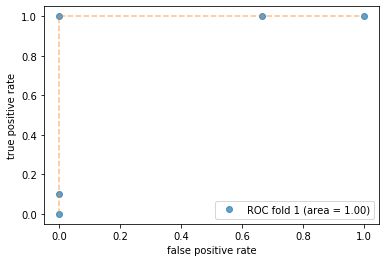

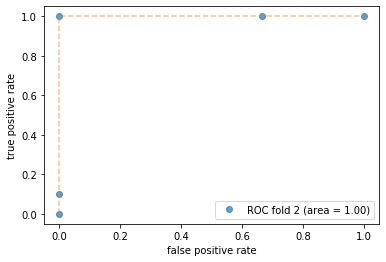

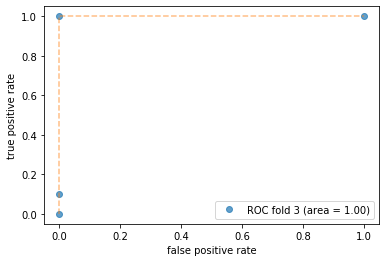

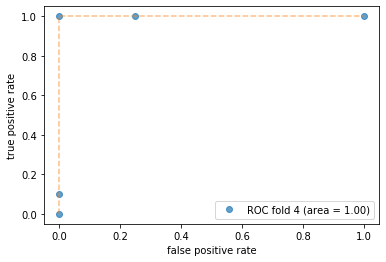

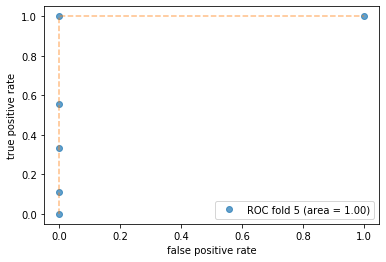

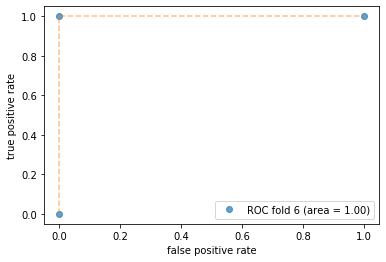

In [137]:
# Cross-validation specification
cv = list(StratifiedKFold(n_splits=6,   random_state=1).split(X, y))

for i, (train, test) in enumerate(cv):
    plt.figure()
    probas = rf.fit(X[train],
                         y[train]).predict_proba(X[test]) 

    # False Positive and True Positive Rates (thresholds for the decision function)
    fpr, tpr, thresholds = roc_curve(y[test],
                                     probas[:, 1],
                                     pos_label=1)
#   print('fpr', fpr)
#   print('tpr', tpr)
    # Add to mean True Predictive Rate in a smoothed variant (interpolated)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 'o', alpha=0.7 ,  label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    plt.plot(fpr, tpr,'--', alpha=0.5 )

    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.legend(loc="lower right")
    plt.show